In [144]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ttest_rel

import sys
sys.path.append('../')
from helper_functions.gridding import h3_grid
from helper_functions.inference_models import ActualDistribution
from helper_functions.metrics import generate_richness_frame, generate_shannon_frame, generate_simpson_frame
from web_interface.func_import import load_data

# Yellow breasted bunting
## Time analysis

In [3]:
bunting_df = pd.read_csv('../../data/yellow breasted bunting/yellow_breasted_bunting.csv')
bunting_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
bunting_df['Year'] = bunting_df['Date'].apply(lambda row: row[:4])
bunting_df

,ScientificName,TaxonID,Date,Latitude,Longitude,Municipality,Year
0,Emberiza aureola,http://tun.fi/MX.35169,1952-09-26 - 1952-09-29,60.239593,25.800290,Porvoo,1952
1,Emberiza aureola,http://tun.fi/MX.35169,1938-07-12,63.377778,30.354404,Lieksa,1938
2,Emberiza aureola,http://tun.fi/MX.35169,1920-06-23,65.204372,25.443245,Oulu,1920
3,Emberiza aureola,http://tun.fi/MX.35169,1920-06-23,65.204372,25.443245,Oulu,1920
4,Emberiza aureola,http://tun.fi/MX.35169,1952-07-12,64.843784,25.415849,Liminka,1952
...,...,...,...,...,...,...,...
166,Emberiza aureola,http://tun.fi/MX.35169,2001-07-03,64.826891,25.313126,Liminka,2001
167,Emberiza aureola,http://tun.fi/MX.35169,2000-06-17,63.553054,27.384495,Iisalmi,2000
168,Emberiza aureola,http://tun.fi/MX.35169,2007-06-03,62.497556,21.734510,Teuva,2007
169,Emberiza aureola,http://tun.fi/MX.35169,2004-05-28 [21:30-23:30],61.129811,24.757690,HÃ¤meenlinna,2004


In [4]:
grid_object = h3_grid()
grid_object.fit(bunting_df)
grid_object.grid_info()

,h3_cell,observations_id,count,neighbors
0,85088227fffffff,"[130, 142]",2,"{85088223fffffff, 8508822ffffffff, 8508835bfff..."
1,85088853fffffff,"[48, 159]",2,"{85088857fffffff, 850888cffffffff, 8508885bfff..."
2,850888a7fffffff,[168],1,"{850888a3fffffff, 850889d3fffffff, 85088d6bfff..."
3,850898b3fffffff,"[118, 170]",2,"{85089887fffffff, 85089d4bfffffff, 850898a3fff..."
4,850899b3fffffff,[132],1,"{85088a4ffffffff, 850899b7fffffff, 850899b3fff..."
5,85089da7fffffff,[99],1,"{85088adbfffffff, 85089daffffffff, 85089da3fff..."
6,8508c24bfffffff,"[2, 3]",2,"{8508c24bfffffff, 8508c243fffffff, 8508c25bfff..."
7,8508d183fffffff,"[6, 7, 9, 10, 11, 21, 22, 25, 28, 29, 30, 31, ...",39,"{8508d193fffffff, 8508d18ffffffff, 8508d19bfff..."
8,8508d18bfffffff,"[12, 160]",2,"{8508d18ffffffff, 8508d113fffffff, 8508d19bfff..."
9,8508d19bfffffff,"[4, 5, 8, 13, 14, 15, 16, 19, 20, 23, 24, 34, ...",59,"{8508d567fffffff, 8508d193fffffff, 8508d19bfff..."


In [5]:
tree_df = pd.read_csv('../../data/samples/tree_data_sample.csv')
tree_df.dropna(subset=['Date', 'Latitude', 'Longitude', 'ScientificName'], inplace=True)
tree_df['Year'] = tree_df['Date'].apply(lambda row: row[:4])
tree_df

,Date,Latitude,Longitude,Municipality,TaxonID,ScientificName,verbatim,Year
0,2023-09-13,60.292760,24.562230,Espoo,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,2023
1,2023-09-11,62.900000,23.300000,"Kuortane, Lapua, Seinäjoki",http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,2023
2,2023-09-10,61.340760,22.137140,Harjavalta,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,2023
3,2023-09-09,60.184950,24.930930,Helsinki,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,2023
4,2023-09-09,60.184570,24.930130,Helsinki,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,2023
...,...,...,...,...,...,...,...,...
114060,1800-01-01 - 1966-12-31,60.323864,23.647645,Salo,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1800
114061,1800-01-01 - 1966-12-31,60.323864,23.647645,Salo,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1800
114062,1800-01-01 - 1966-12-31,60.323864,23.647645,Salo,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1800
114063,1800-01-01 - 1966-12-31,60.323864,23.647645,Salo,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1800


In [6]:
grid_object = h3_grid()
grid_object.fit(tree_df)
grid_object.grid_info()

,h3_cell,observations_id,count,neighbors
0,85012613fffffff,"[9562, 78059, 109502, 113234]",4,"{85012603fffffff, 8501268ffffffff, 8501261bfff..."
1,8501261bfffffff,"[473, 9335, 9345, 9426, 9427, 9485, 9510, 9536...",27,"{85012603fffffff, 850126cffffffff, 8501261bfff..."
2,85012643fffffff,"[76368, 107634]",2,"{85012647fffffff, 8501264ffffffff, 85012653fff..."
3,85012647fffffff,"[76362, 76369, 107631, 109126]",4,"{85012647fffffff, 8501264ffffffff, 8501267bfff..."
4,8501264bfffffff,"[102955, 107707, 109417]",3,"{85013587fffffff, 8501264ffffffff, 8501265bfff..."
...,...,...,...,...
2094,852a33dbfffffff,"[58012, 58013, 67131, 68160, 68165]",5,"{852a33c3fffffff, 852a33dbfffffff, 852a32affff..."
2095,852aa38ffffffff,"[71939, 71940]",2,"{852aa383fffffff, 852aa38bfffffff, 852aa313fff..."
2096,852ec31bfffffff,"[67902, 69939, 69974, 70518, 70685, 71261, 714...",56,"{852ec357fffffff, 852ec31bfffffff, 852ec30bfff..."
2097,85314293fffffff,"[76219, 76220]",2,"{8531462bfffffff, 8531429bfffffff, 85314297fff..."


In [24]:
def find_suitable_threshold (target_df, population_df, threshold_year):
    target_before = target_df[target_df['Year'].astype(int) <= threshold_year]
    target_after = target_df[target_df['Year'].astype(int) > threshold_year]
    suitable_cells = set(target_before['h3_cell']) - set(target_after['h3_cell'])
    suitable_population = population_df[population_df['h3_cell'].isin(suitable_cells)]
    suitable_population_before = suitable_population[suitable_population['Year'].astype(int) <= threshold_year]
    suitable_population_after = suitable_population[suitable_population['Year'].astype(int) > threshold_year]
    return suitable_population, suitable_population_before, suitable_population_after

suitable_tree_df, suitable_tree_before, suitable_tree_after = find_suitable_threshold(bunting_df, tree_df, 2000)
suitable_tree_df

,Date,Latitude,Longitude,Municipality,TaxonID,ScientificName,verbatim,Year,h3_cell
55,2023-09-01,64.945420,25.547420,Oulu,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,2023,8508d18bfffffff
61,2023-09-01,62.627361,29.644173,Joensuu,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,2023,85112e07fffffff
63,2023-08-31,62.619941,29.652967,Joensuu,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,2023,85112e07fffffff
128,2023-08-20,60.571520,26.705670,Pyhtää,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,2023,8511229bfffffff
217,2023-07-31,64.916050,25.570510,Kempele,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,2023,8508d18bfffffff
...,...,...,...,...,...,...,...,...,...
113554,1800-01-01 - 1964-12-31,63.596095,27.298907,Iisalmi,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1800,8508d35bfffffff
113797,1800-01-01 - 1958-12-31,60.767062,23.417772,Jokioinen,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1800,850899b3fffffff
113798,1800-01-01 - 1950-12-31,60.771830,23.600919,Tammela,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1800,850899b3fffffff
113799,1800-01-01 - 1925-12-31,60.771830,23.600919,Tammela,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1800,850899b3fffffff


Mean richness before: 33
Mean richness after: 49


C:\Users\LAM HAI YEN\AppData\Local\Temp\ipykernel_24540\470658686.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


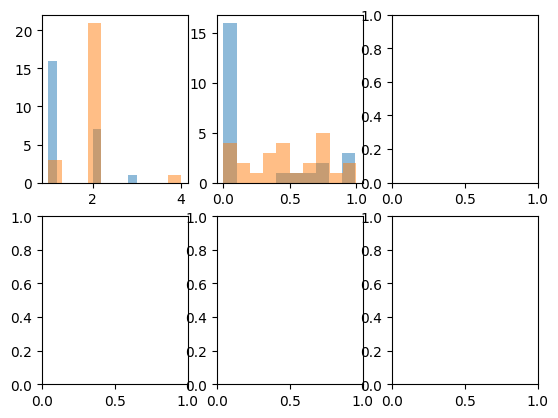

In [41]:
def plot_diff (population_before, population_after):
    
    actual_model = ActualDistribution('h3_cell', 'ScientificName')
    actual_dist_before = actual_model.fit(population_before)
    actual_dist_after = actual_model.fit(population_after)
    
    richness_before = generate_richness_frame(actual_dist_before)
    richness_after = generate_richness_frame(actual_dist_after)

    print("Mean richness before: " + str(np.sum(richness_before['richness'])))
    print("Mean richness after: " + str(np.sum(richness_after['richness'])))

    fig, axs = plt.subplots(nrows=2, ncols=3)
    axs[0, 0].hist(richness_before['richness'], alpha=0.5, linewidth=1.2)
    axs[0, 0].hist(richness_after['richness'], alpha=0.5, linewidth=1.2)

    shannon_before = generate_shannon_frame(actual_dist_before)
    shannon_after = generate_shannon_frame(actual_dist_after)
    
    axs[0, 1].hist(shannon_before['shannon_entropy'], alpha=0.5, linewidth=1.2)
    axs[0, 1].hist(shannon_after['shannon_entropy'], alpha=0.5, linewidth=1.2)

    return fig

fig = plot_diff(suitable_tree_before, suitable_tree_after)
fig.show()

In [7]:
birds_df = load_data()  
birds_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
birds_df['Year'] = birds_df['Date'].apply(lambda row: row[:4])
birds_df

,ScientificName,TaxonID,Date,Latitude,Longitude,Municipality,Year
0,Strix aluco,http://tun.fi/MX.28998,2000-01-01 - 2000-12-31,60.340900,25.242500,Sipoo,2000
1,Fringilla coelebs,http://tun.fi/MX.36237,2001-07-24,60.177000,24.202000,Siuntio,2001
2,Certhia familiaris,http://tun.fi/MX.34616,2000-05-14,60.442100,24.519000,Vihti,2000
3,Cyanistes caeruleus,http://tun.fi/MX.34574,2000-04-25,61.593000,27.318800,Mikkeli,2000
4,Corvus monedula,http://tun.fi/MX.37142,2001-04-22,60.177000,24.202000,Siuntio,2001
...,...,...,...,...,...,...,...
987433,Picoides tridactylus,http://tun.fi/MX.30453,2022-06-07,68.925050,26.778422,Inari,2022
987434,Picoides tridactylus,http://tun.fi/MX.30453,2022-06-21,69.018273,26.737819,Inari,2022
987435,Motacilla flava,http://tun.fi/MX.32180,2022-05-19,61.226294,28.811891,Imatra,2022
987436,Delichon urbicum,http://tun.fi/MX.32163,2022-05-19,61.221876,28.797762,Imatra,2022


In [8]:
grid_object = h3_grid()
grid_object.fit(birds_df)
grid_object.grid_info()

,h3_cell,observations_id,count,neighbors
0,85012603fffffff,"[83371, 83379, 83388, 83391, 83392, 83393, 833...",1450,"{85012603fffffff, 8501261bfffffff, 8501260ffff..."
1,85012613fffffff,"[83372, 83373, 83374, 83375, 83376, 83377, 833...",1165,"{85012603fffffff, 8501268ffffffff, 8501261bfff..."
2,85012617fffffff,"[1012023, 1106452, 1106453, 1106454, 1106455, ...",52,"{85012603fffffff, 8501268ffffffff, 850126bbfff..."
3,8501261bfffffff,"[4865, 4866, 5194, 5195, 653607, 2681, 4502, 4...",1365,"{85012603fffffff, 850126cffffffff, 8501261bfff..."
4,85012643fffffff,"[709475, 709476, 709477, 709478, 709479, 70948...",447,"{85012647fffffff, 8501264ffffffff, 85012653fff..."
...,...,...,...,...
2063,85112ed3fffffff,"[196349, 530183, 537374, 569130, 582496, 61454...",2895,"{85112ed3fffffff, 85112edbfffffff, 851123a7fff..."
2064,85112ed7fffffff,"[197417, 205764, 403088, 530176, 530177, 70028...",2062,"{85112ed3fffffff, 85112e9bfffffff, 85112ec7fff..."
2065,85112edbfffffff,"[196347, 196348, 268174, 268175, 268176, 66772...",3742,"{85112ed3fffffff, 85112ecbfffffff, 85112337fff..."
2066,851135a7fffffff,[647965],1,"{851135affffffff, 851122d3fffffff, 851135b7fff..."


In [36]:
suitable_birds_df, suitable_birds_before, suitable_birds_after = find_suitable_threshold(bunting_df, birds_df, 2004)
suitable_birds_df

,ScientificName,TaxonID,Date,Latitude,Longitude,Municipality,Year,h3_cell
37,Cygnus cygnus,http://tun.fi/MX.26280,2001-10-18,63.315400,30.042400,Lieksa,2001,85112813fffffff
61,Carduelis spinus,http://tun.fi/MX.36287,2001-07-31,60.239593,25.800290,Porvoo,2001,85112657fffffff
62,Bombycilla garrulus,http://tun.fi/MX.32608,2001-10-12,60.239593,25.800290,Porvoo,2001,85112657fffffff
70,Ficedula hypoleuca,http://tun.fi/MX.34021,2000-08-08,59.810200,22.895800,Hanko,2000,850898b3fffffff
86,Corvus corone cornix,http://tun.fi/MX.37166,2000-04-01 - 2000-04-30,64.256107,23.921607,Kalajoki,2000,8508d427fffffff
...,...,...,...,...,...,...,...,...
987398,Parus major,http://tun.fi/MX.34567,2022-07-14,61.545375,29.503310,Parikkala,2022,8511059bfffffff
987399,Fringilla coelebs,http://tun.fi/MX.36237,2022-07-14,61.543862,29.503018,Parikkala,2022,8511059bfffffff
987400,Parus major,http://tun.fi/MX.34567,2022-07-14,61.543146,29.497992,Parikkala,2022,8511059bfffffff
987401,Cyanistes caeruleus,http://tun.fi/MX.34574,2022-07-14,61.543470,29.495985,Parikkala,2022,8511059bfffffff


Mean richness before: 2489
Mean richness after: 5483


C:\Users\LAM HAI YEN\AppData\Local\Temp\ipykernel_24540\1241081335.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


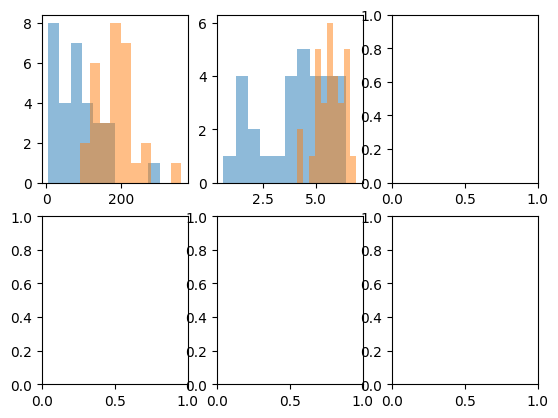

In [42]:
fig = plot_diff(suitable_birds_before, suitable_birds_after)
fig.show()

In [129]:
def find_endpoints (target_df):
    latest_year = target_df.groupby(['h3_cell'])['Year'].transform(max)
    latest_year = latest_year.tolist()
    cell_to_latest = dict(zip(target_df['h3_cell'].tolist(), latest_year))

    earliest_year = target_df.groupby(['h3_cell'])['Year'].transform(min)
    earliest_year = earliest_year.tolist()
    cell_to_earliest = dict(zip(target_df['h3_cell'].tolist(), earliest_year))
    return cell_to_latest, cell_to_earliest

find_endpoints(bunting_df)

C:\Users\LAM HAI YEN\AppData\Local\Temp\ipykernel_29944\3213564387.py:2: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.

C:\Users\LAM HAI YEN\AppData\Local\Temp\ipykernel_29944\3213564387.py:6: FutureWarning:

The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.



({'85112657fffffff': '1952',
  '85112803fffffff': '1938',
  '8508c24bfffffff': '1920',
  '8508d19bfffffff': '2003',
  '8508d183fffffff': '1999',
  '8508d18bfffffff': '1971',
  '85112ad7fffffff': '1993',
  '85112ad3fffffff': '1996',
  '85112e3bfffffff': '2001',
  '851123cffffffff': '2003',
  '8511229bfffffff': '1966',
  '8508d427fffffff': '1996',
  '85088853fffffff': '1984',
  '8508d80bfffffff': '1990',
  '85112813fffffff': '1984',
  '85110583fffffff': '1988',
  '8511059bfffffff': '1986',
  '8511236ffffffff': '1986',
  '85112ebbfffffff': '1999',
  '85112e07fffffff': '1987',
  '851105b7fffffff': '1975',
  '85089da7fffffff': '2023',
  '850898b3fffffff': '1996',
  '851124d3fffffff': '1998',
  '8508d803fffffff': '1976',
  '85088227fffffff': '1977',
  '8508d577fffffff': '1977',
  '850899b3fffffff': '1982',
  '85112d8ffffffff': '1993',
  '85112e57fffffff': '2007',
  '8508d35bfffffff': '2000',
  '850888a7fffffff': '2007',
  '85112457fffffff': '2004'},
 {'85112657fffffff': '1952',
  '85112803ff

In [130]:
def find_suitable_disappearance (target_df, population_df):
    cell_to_latest, cell_to_earliest = find_endpoints(target_df)
    population_before = [pd.DataFrame(columns = population_df.columns) for i in range(3)]
    population_appearance = pd.DataFrame(columns = population_df.columns)
    population_after = [pd.DataFrame(columns=population_df.columns) for i in range(3)]

    for cell in cell_to_latest:
        cell_population = population_df[population_df['h3_cell'] == cell]
        population_appearance = pd.concat([
            population_appearance, 
            cell_population[(cell_population['Year'].astype(int) <= int(cell_to_latest[cell])) & 
                            (cell_population['Year'].astype(int) >= int(cell_to_earliest[cell]))]
        ])
        for i in range(3):
            population_before[i] = pd.concat([
                population_before[i],
                cell_population[(cell_population['Year'].astype(int) <= (int(cell_to_latest[cell]) - i*3 - 1)) &
                                (cell_population['Year'].astype(int) > (int(cell_to_latest[cell]) - (i + 1)*3 - 1))]
            ])
            population_after[i] = pd.concat([
                population_after[i],
                cell_population[(cell_population['Year'].astype(int) >= (int(cell_to_latest[cell]) + i*3 + 1)) &
                                (cell_population['Year'].astype(int) < (int(cell_to_latest[cell]) + (i + 1)*3 + 1))]
            ])
            
    return cell_to_latest, cell_to_earliest, population_before, population_appearance, population_after

cell_to_latest, cell_to_earliest, tree_before, tree_appearance, tree_after = find_suitable_disappearance(bunting_df, tree_df)
print(set(tree_appearance['h3_cell']))
tree_appearance

C:\Users\LAM HAI YEN\AppData\Local\Temp\ipykernel_29944\3213564387.py:2: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.

C:\Users\LAM HAI YEN\AppData\Local\Temp\ipykernel_29944\3213564387.py:6: FutureWarning:

The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.

C:\Users\LAM HAI YEN\AppData\Local\Temp\ipykernel_29944\3420110926.py:20: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\LAM HAI Y

{'85112ebbfffffff', '85088227fffffff', '8508d19bfffffff', '85112ad3fffffff', '85112e3bfffffff', '850888a7fffffff', '85112813fffffff', '8508d183fffffff'}


,Date,Latitude,Longitude,Municipality,TaxonID,ScientificName,verbatim,Year,h3_cell
84269,1999-07-27,64.829209,25.311193,Liminka,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1999,8508d19bfffffff
94053,1988-07-25,64.836557,25.173743,Lumijoki,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1988,8508d19bfffffff
83898,1999-09-19,65.014283,25.548765,Oulu,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1999,8508d183fffffff
83914,1999-09-16,65.036919,25.436072,Oulu,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1999,8508d183fffffff
83915,1999-09-16,65.033682,25.426706,Oulu,http://tun.fi/MX.37823,Pinus sibirica,Pinus cembra subsp. sibirica,1999,8508d183fffffff
...,...,...,...,...,...,...,...,...,...
88472,1994-07-12,62.671619,28.997243,Outokumpu,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1994,85112ebbfffffff
88479,1994-07-12,62.653962,28.976543,Outokumpu,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1994,85112ebbfffffff
101816,1977-01-01 - 1978-12-31,59.839816,19.933462,Lemland,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,1977,85088227fffffff
74337,2007-06-17,62.502566,21.811469,Teuva,http://tun.fi/MX.37819,Pinus sylvestris,Pinus sylvestris,2007,850888a7fffffff


In [174]:
actual_model = ActualDistribution('h3_cell', 'ScientificName')
actual_dist_appearance = actual_model.fit(tree_appearance)
actual_dist_before = [actual_model.fit(population_before) for population_before in tree_before]
actual_dist_after = [actual_model.fit(population_after) for population_after in tree_after]

def merge_richness (distribution_before, distribution_appearance, distribution_after):
    richness_appearance = generate_richness_frame(distribution_appearance)
    richness_appearance.rename(columns={'richness': 'richness_appearance'}, inplace=True)
    richness_appearance.set_index('h3_cell', inplace=True)
    time_columns = ['richness_appearance']
    richness_merged = richness_appearance.copy()
    for i in range(3):
        dist_before = distribution_before[i]
        dist_after = distribution_after[i]

        r_before_column = 'richness_before_{}_{}'.format(i*3+1, (i+1)*3)
        r_before = generate_richness_frame(dist_before)
        r_before.rename(columns = {'richness': r_before_column}, inplace = True)
        r_before.set_index('h3_cell', inplace=True)
        time_columns = [r_before_column] + time_columns
        
        r_after_column = 'richness_after_{}_{}'.format(i*3+1, (i+1)*3)
        r_after = generate_richness_frame(dist_after)
        r_after.rename(columns = {'richness': r_after_column}, inplace = True)
        r_after.set_index('h3_cell', inplace=True)
        time_columns = time_columns + [r_after_column]

        richness_merged = pd.merge(richness_merged, r_before, how='outer', left_index=True, right_index=True)
        richness_merged = pd.merge(richness_merged, r_after, how='outer', left_index=True, right_index=True)
    
    richness_merged.dropna(subset = ['richness_appearance'], inplace = True)
    richness_merged = richness_merged[time_columns]
    return richness_merged

richness_merged = merge_richness (actual_dist_before, actual_dist_appearance, actual_dist_after)
richness_merged

,richness_before_7_9,richness_before_4_6,richness_before_1_3,richness_appearance,richness_after_1_3,richness_after_4_6,richness_after_7_9
h3_cell,,,,,,,
85088227fffffff,NaN,NaN,NaN,1.0,NaN,NaN,NaN
850888a7fffffff,NaN,NaN,NaN,1.0,2.0,NaN,NaN
8508d183fffffff,NaN,1.0,2.0,2.0,3.0,2.0,1.0
8508d19bfffffff,NaN,1.0,NaN,1.0,NaN,1.0,NaN
85112813fffffff,NaN,NaN,NaN,1.0,NaN,NaN,NaN
85112ad3fffffff,1.0,1.0,NaN,1.0,1.0,NaN,1.0
85112e3bfffffff,1.0,1.0,1.0,1.0,2.0,1.0,1.0
85112ebbfffffff,NaN,1.0,NaN,1.0,NaN,1.0,1.0


In [175]:
def test_effect (merged_metrics):
    test_results = []
    test_pairs = []
    for column1 in merged_metrics.columns:
        for column2 in merged_metrics.columns:
            if column1 == column2:
                continue
            if ("before" in column1 and "before" in column2) or ("after" in column1 and "after" in column2):
                continue
            if (column2, column1) in test_pairs:
                continue
            valid_indices = (merged_metrics[column1].notna()) & (merged_metrics[column2].notna())
            valid_1 = merged_metrics[column1][valid_indices]
            valid_2 = merged_metrics[column2][valid_indices]
            test_results.append(ttest_rel(valid_1, valid_2))
            test_pairs.append((column1, column2))
    return test_results, test_pairs

def log_effect (test_results, test_pairs, sign_threshold = 0.05):
    test_pvalues = [test.pvalue for test in test_results]
    most_sign_index = np.nanargmin(test_pvalues)
    print("Pair with most significant difference: {}".format(test_pairs[most_sign_index]))
    print("Smallest p-value: {}".format(test_pvalues[most_sign_index]))
    print()

    print("Pairs with significant difference at alpha = {}:".format(sign_threshold))
    print("===================================================")
    sign_indices = np.array(test_pvalues) <= sign_threshold
    sign_pairs = (np.array(test_pairs)[sign_indices]).tolist()
    sign_pvalues = (np.array(test_pvalues)[sign_indices]).tolist()
    for i in range(len(sign_pairs)):
        print("'{}' and '{}' -- pvalue: {}".format(sign_pairs[i][0], sign_pairs[i][1], sign_pvalues[i]))

test_results, test_pairs = test_effect(richness_merged)
log_effect (test_results, test_pairs)

Pair with most significant difference: ('richness_before_1_3', 'richness_after_1_3')
Smallest p-value: 0.0

Pairs with significant difference at alpha = 0.05:
'richness_before_1_3' and 'richness_after_1_3' -- pvalue: 0.0


c:\Users\LAM HAI YEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning:

divide by zero encountered in divide

c:\Users\LAM HAI YEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning:

invalid value encountered in scalar multiply

c:\Users\LAM HAI YEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



In [176]:
def plot_paired_effect (merged_df, time_stamps = ['before_1_3', 'appearance', 'after_1_3'], 
                        cell_to_latest = None, cell_to_earliest = None,
                        title = None):
    metric_name = merged_df.columns[0].split('_')[0]
    if title == None:
        title = metric_name.title()

    merged_metric = merged_df.copy()
    merged_metric = merged_metric[[metric_name + "_" + time_stamp for time_stamp in time_stamps]]
    merged_metric.dropna(inplace = True)

    data = []
    for column in merged_metric.columns:
        data.append(go.Bar(
            name = column,
            x = merged_metric.index,
            y = merged_metric[column]
        ))

    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.update_layout(
        title_text=title,
        title_x=0.5
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Area Id")

    # Set y-axes titles
    fig.update_yaxes(title_text=metric_name.title(), secondary_y=False)
    for column in merged_metric.columns:
        fig.add_trace(go.Bar(
            name = column,
            x = merged_metric.index,
            y = merged_metric[column]
        ), secondary_y=False)
    
    if cell_to_latest != None and cell_to_earliest != None:
        fig.add_trace(
            go.Scatter(
                x = merged_metric.index, 
                y = merged_metric.index.map(lambda cell: int(cell_to_latest[cell]) - int(cell_to_earliest[cell])).tolist(), 
                line=dict(color='rgb(235, 211, 54)', width=3),
                marker=dict(color='rgb(235, 211, 54)', size=10),
                name="nof_years_with_obs"), 
                secondary_y=True)
        fig.update_yaxes(title_text="Number of years with observations", secondary_y=True)
        return fig
    return fig

fig = plot_paired_effect(richness_merged, cell_to_earliest=cell_to_earliest, cell_to_latest=cell_to_latest,
                         title = "Tree species richness in areas<br>before, with and after yellow-breasted bunting observations")
fig.write_html(f"../web_interface/precomp_data/keystone/tree_paired_bunting_effect.html")
fig.show()

In [169]:
cell_to_latest, cell_to_earliest, bird_before, bird_appearance, bird_after = find_suitable_disappearance(bunting_df, birds_df)
print(set(bird_appearance['h3_cell']))
bird_appearance

C:\Users\LAM HAI YEN\AppData\Local\Temp\ipykernel_29944\3213564387.py:2: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.

C:\Users\LAM HAI YEN\AppData\Local\Temp\ipykernel_29944\3213564387.py:6: FutureWarning:

The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.

C:\Users\LAM HAI YEN\AppData\Local\Temp\ipykernel_29944\3420110926.py:9: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\LAM HAI YE

{'85112457fffffff', '8508d19bfffffff', '85112e3bfffffff', '85112e57fffffff', '851123cffffffff', '850888a7fffffff', '8508d35bfffffff', '85089da7fffffff'}


,ScientificName,TaxonID,Date,Latitude,Longitude,Municipality,Year,h3_cell
652,Cyanistes caeruleus,http://tun.fi/MX.34574,2000-05-03,64.843784,25.415498,Liminka,2000,8508d19bfffffff
657,Perdix perdix,http://tun.fi/MX.27048,2000-01-31,64.843784,25.415849,Liminka,2000,8508d19bfffffff
659,Emberiza citrinella,http://tun.fi/MX.35146,2000-05-10,64.843784,25.415849,Liminka,2000,8508d19bfffffff
673,Asio otus,http://tun.fi/MX.29068,2000-04-28,64.843784,25.415849,Liminka,2000,8508d19bfffffff
684,Emberiza schoeniclus,http://tun.fi/MX.35182,2000-05-20,64.843784,25.415849,Liminka,2000,8508d19bfffffff
...,...,...,...,...,...,...,...,...
715626,Sylvia borin,http://tun.fi/MX.33935,2004-05-28 [21:30-23:30],61.129811,24.757690,Hämeenlinna,2004,85112457fffffff
715627,Sylvia atricapilla,http://tun.fi/MX.33934,2004-05-28 [21:30-23:30],61.129811,24.757690,Hämeenlinna,2004,85112457fffffff
715628,Phylloscopus trochilus,http://tun.fi/MX.33873,2004-05-28 [21:30-23:30],61.129811,24.757690,Hämeenlinna,2004,85112457fffffff
715629,Carpodacus erythrinus,http://tun.fi/MX.36331,2004-05-28 [21:30-23:30],61.129811,24.757690,Hämeenlinna,2004,85112457fffffff


In [177]:
actual_model = ActualDistribution('h3_cell', 'ScientificName')
actual_dist_appearance = actual_model.fit(bird_appearance)
actual_dist_before = [actual_model.fit(population_before) for population_before in bird_before]
actual_dist_after = [actual_model.fit(population_after) for population_after in bird_after]

richness_merged = merge_richness (actual_dist_before, actual_dist_appearance, actual_dist_after)
richness_merged

,richness_before_7_9,richness_before_4_6,richness_before_1_3,richness_appearance,richness_after_1_3,richness_after_4_6,richness_after_7_9
h3_cell,,,,,,,
850888a7fffffff,31.0,37.0,105.0,93.0,125.0,120.0,136.0
85089da7fffffff,49.0,35.0,74.0,73.0,NaN,NaN,NaN
8508d19bfffffff,NaN,NaN,143.0,149.0,162.0,154.0,146.0
8508d35bfffffff,NaN,NaN,NaN,6.0,4.0,71.0,108.0
851123cffffffff,NaN,NaN,6.0,7.0,49.0,75.0,68.0
85112457fffffff,NaN,9.0,25.0,24.0,58.0,100.0,29.0
85112e3bfffffff,NaN,NaN,73.0,95.0,105.0,144.0,159.0
85112e57fffffff,5.0,13.0,13.0,62.0,59.0,2.0,8.0


In [178]:
test_results, test_pairs = test_effect(richness_merged)
log_effect (test_results, test_pairs)

Pair with most significant difference: ('richness_before_1_3', 'richness_after_1_3')
Smallest p-value: 0.0009079358550496963

Pairs with significant difference at alpha = 0.05:
'richness_before_4_6' and 'richness_appearance' -- pvalue: 0.021700101929672467
'richness_before_4_6' and 'richness_after_1_3' -- pvalue: 0.04582613681047108
'richness_before_1_3' and 'richness_after_1_3' -- pvalue: 0.0009079358550496963
'richness_appearance' and 'richness_after_1_3' -- pvalue: 0.03873293801151282


In [179]:
fig = plot_paired_effect(richness_merged, cell_to_earliest=cell_to_earliest, cell_to_latest=cell_to_latest,
                         title = "Bird species richness <br>before, with and after yellow-breasted bunting observations")
fig.write_html(f"../web_interface/precomp_data/keystone/bird_paired_bunting_effect.html")
fig.show()